In [1]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [2]:
import numpy as np
from sktime.datasets import load_airline
airline=load_airline()
airline


Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

### Reduction Approach(y)

In [3]:
features=[]
target=[]

for i in range(len(airline)-10):
    features.append(airline[i:i+10])
    target.append(airline[i+10])

In [4]:
features=np.array(features)
target=np.array(target)

In [5]:
features.shape


(134, 10)

In [6]:
features


array([[112., 118., 132., ..., 148., 136., 119.],
       [118., 132., 129., ..., 136., 119., 104.],
       [132., 129., 121., ..., 119., 104., 118.],
       ...,
       [405., 417., 391., ..., 622., 606., 508.],
       [417., 391., 419., ..., 606., 508., 461.],
       [391., 419., 461., ..., 508., 461., 390.]])

In [7]:
target.shape

(134,)

In [8]:
target

array([104., 118., 115., 126., 141., 135., 125., 149., 170., 170., 158.,
       133., 114., 140., 145., 150., 178., 163., 172., 178., 199., 199.,
       184., 162., 146., 166., 171., 180., 193., 181., 183., 218., 230.,
       242., 209., 191., 172., 194., 196., 196., 236., 235., 229., 243.,
       264., 272., 237., 211., 180., 201., 204., 188., 235., 227., 234.,
       264., 302., 293., 259., 229., 203., 229., 242., 233., 267., 269.,
       270., 315., 364., 347., 312., 274., 237., 278., 284., 277., 317.,
       313., 318., 374., 413., 405., 355., 306., 271., 306., 315., 301.,
       356., 348., 355., 422., 465., 467., 404., 347., 305., 336., 340.,
       318., 362., 348., 363., 435., 491., 505., 404., 359., 310., 337.,
       360., 342., 406., 396., 420., 472., 548., 559., 463., 407., 362.,
       405., 417., 391., 419., 461., 472., 535., 622., 606., 508., 461.,
       390., 432.])

In [9]:
airline.shape

(144,)

In [10]:
train_len=int(len(target)*0.80)

In [11]:
train_len

107

In [12]:
train_features=features[:train_len]
train_target=target[:train_len]
test_features=features[train_len:]
test_target=target[train_len:]

In [13]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()
reg.fit(train_features, train_target)


DecisionTreeRegressor()

In [14]:

reg.predict(test_features)


array([465., 422., 422., 422., 340., 348., 435., 465., 465., 491., 491.,
       467., 491., 465., 422., 465., 465., 465., 465., 491., 491., 491.,
       491., 491., 491., 491., 465.])

### Using Sktime Library

In [15]:
from sktime.forecasting.model_selection import temporal_train_test_split

In [16]:
from sktime.forecasting.compose import ReducedRegressionForecaster

In [17]:
regressor=DecisionTreeRegressor()
reduced_reg=ReducedRegressionForecaster(regressor=regressor,window_length=10)

In [18]:
y_train,y_test=temporal_train_test_split(airline,test_size=36)

In [19]:
reduced_reg.fit(y_train)

RecursiveRegressionForecaster(regressor=DecisionTreeRegressor())

In [20]:
y_pred=reduced_reg.predict(np.arange(1,37))

In [21]:
y_pred

1958-01    306.0
1958-02    318.0
1958-03    306.0
1958-04    318.0
1958-05    306.0
1958-06    318.0
1958-07    306.0
1958-08    271.0
1958-09    306.0
1958-10    277.0
1958-11    301.0
1958-12    277.0
1959-01    301.0
1959-02    277.0
1959-03    301.0
1959-04    277.0
1959-05    277.0
1959-06    277.0
1959-07    277.0
1959-08    277.0
1959-09    277.0
1959-10    277.0
1959-11    277.0
1959-12    277.0
1960-01    277.0
1960-02    277.0
1960-03    277.0
1960-04    277.0
1960-05    277.0
1960-06    277.0
1960-07    277.0
1960-08    277.0
1960-09    277.0
1960-10    277.0
1960-11    277.0
1960-12    277.0
Freq: M, dtype: float64

In [22]:
from sktime.utils.plotting import plot_series


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

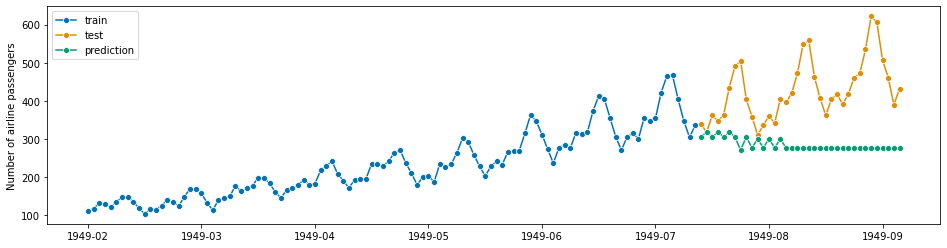

In [23]:
plot_series(y_train,y_test,y_pred, labels=['train','test','prediction'])